In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
train.shape


(1460, 81)

In [ ]:
test.shape

(1459, 80)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# sales price column is missing

In [ ]:
df = pd.concat([train,test])

In [ ]:
df.shape

(2919, 81)

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [ ]:
pd.set_option('display.max_row',3000)
pd.set_option('display.max_columns',100)


In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [ ]:
df.tail()
#here whatever value not present in test set will get value "NAN" like SalePrice coulumn

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [ ]:
df.info()
#after running this , we have seen that some of the coulmns those are numericla in nature but treated as categorical data like date 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [ ]:
df.select_dtypes(include=['int64','float64']).columns
#below columns are only int and float type
#few columns like YrSold,YearBuilt are categorical but coming in int type , so later we will convert them

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
df.select_dtypes(include=['object']).columns
#below columns are only object type
#here few columns are ordinal but coming in object so we will convert them later

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
df = df.set_index('Id')
#indexing as Id column

In [ ]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [ ]:
abc = df.isnull().sum()/df.shape[0]*100
#checking missing value of columns 
#so calculating % of emptyness
#Alley - 93.21 ( here Alley column is 93% empty)

In [ ]:
abc


MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType        0.822199
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
T

In [ ]:
columns_drop = abc[abc>20].keys()
#here we are removing columns wichh are empty more than 20%  

In [ ]:
columns_drop
#below columns are empty more than 20%


Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'SalePrice'], dtype='object')

In [ ]:
df = df.drop(columns_drop,axis=1)
#dropping columns

In [ ]:
df.shape

(2919, 74)

In [ ]:
columns = list(df.columns.values)
for i in columns:
    print(i.ljust(25) + "\t" + str(len(df[i].unique())))
 #here we are checking number of unique values individual coloumn has   

MSSubClass               	16
MSZoning                 	6
LotFrontage              	129
LotArea                  	1951
Street                   	2
LotShape                 	4
LandContour              	4
Utilities                	3
LotConfig                	5
LandSlope                	3
Neighborhood             	25
Condition1               	9
Condition2               	8
BldgType                 	5
HouseStyle               	8
OverallQual              	10
OverallCond              	9
YearBuilt                	118
YearRemodAdd             	61
RoofStyle                	6
RoofMatl                 	8
Exterior1st              	16
Exterior2nd              	17
MasVnrType               	5
MasVnrArea               	445
ExterQual                	4
ExterCond                	5
Foundation               	6
BsmtQual                 	5
BsmtCond                 	5
BsmtExposure             	5
BsmtFinType1             	7
BsmtFinSF1               	992
BsmtFinType2             	7
BsmtFinSF2               	273
B

In [ ]:
col_headers = list(df.columns.values)
for i in col_headers:
    print(i)
    print(df[i].unique())
    print("\n")

    #checking unique values ,for better understanding

MSSubClass
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40 150]


MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH' nan]


LotFrontage
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.  26.
  25. 119.  31.  28. 117. 113. 125. 135. 136.  22. 123. 195. 155. 126.
 200. 131. 133.]


LotArea
[ 8450  9600 11250 ...  1894 20000 10441]


Street
['Pave' 'Grvl']


LotShape
['Reg' 'IR1' 'IR2' 'IR3']


LandContour
['Lvl' 'Bnk' 'Low' 'HLS']


Utilities
['AllPub' 'NoSeWa' nan]


LotConfig
['In

# Detecting outlier

In [ ]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

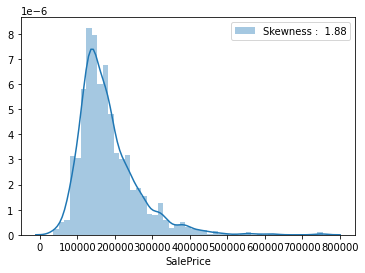

In [ ]:
g = sns.distplot (train['SalePrice'])
g = g.legend(['Skewness :  {:.2f}'.format(train['SalePrice'].skew())],loc='best')
#checking skewness of target column  - SalePrice
#we can see there is less amount of skewness 1.88 postively skewed

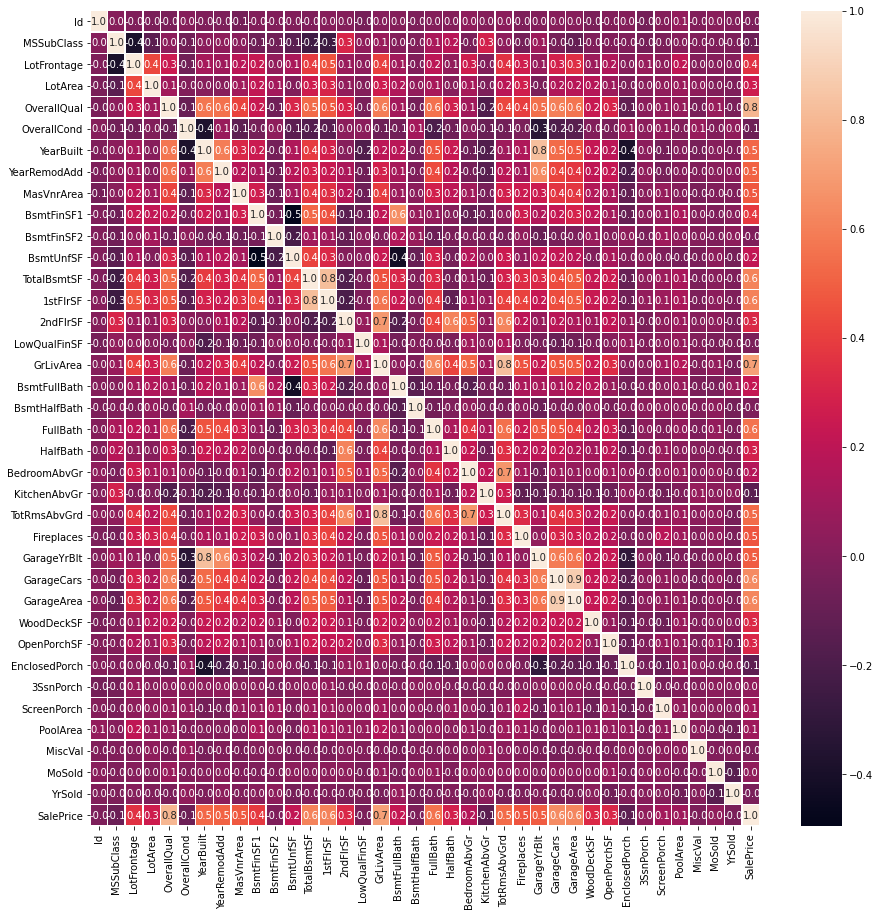

In [ ]:
f,ax = plt.subplots(figsize = (15,15))
sns.heatmap(train.corr(),annot=True,linewidths= 0.5 ,fmt = '.1f',ax=ax)
plt.show()
#checking correlation
#using train dataset because there we have SalePrice to check correlated variables

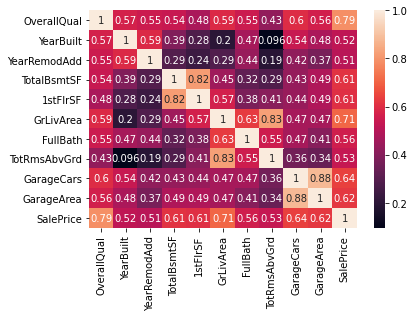

In [ ]:
corre = train.corr()
top_corr_features = corre.index[abs(corre['SalePrice'])>0.5]
g = sns.heatmap(train[top_corr_features].corr(),annot=True)
#here we are checking top correlated features

Now we will see Distribution

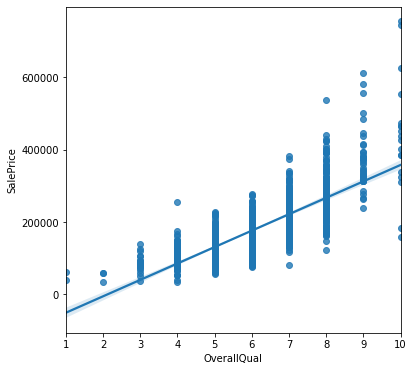

In [ ]:
f,ax = plt.subplots(figsize = (6,6))
sns.regplot(data=train, x = "OverallQual" , y = "SalePrice")


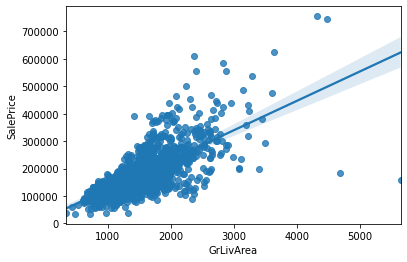

In [ ]:
sns.regplot(data=train , x="GrLivArea",y="SalePrice")

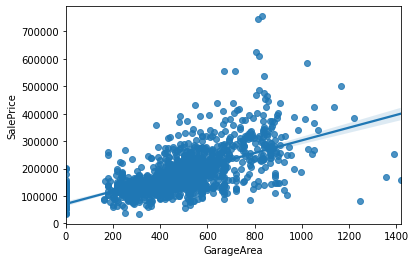

In [ ]:
sns.regplot(data = train , x="GarageArea",y="SalePrice")

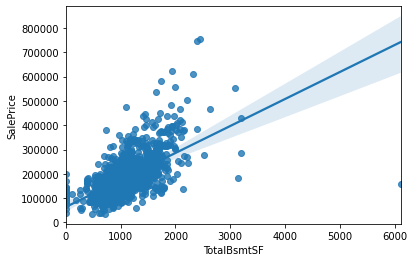

In [ ]:
sns.regplot(data = train , x="TotalBsmtSF",y="SalePrice")

Missing value Imputation

In [ ]:
missing_cols = df.columns[df.isnull().any()]
#extracting columns with any missing value

In [ ]:
missing_cols
#Below columns have missing values

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath',
       'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'SaleType'],
      dtype='object')

Now , starting with Basement features with missing values

In [ ]:
bsmt_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
#Here , 11 basement columns have missing values       

In [ ]:
bsmt_cols


['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath']

In [ ]:
bsmt_feat = df[bsmt_cols]
#creating new dataframe which filters out only above columns,this way we are not messing up with dataset

In [ ]:
bsmt_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BsmtQual      2838 non-null   object 
 1   BsmtCond      2837 non-null   object 
 2   BsmtExposure  2837 non-null   object 
 3   BsmtFinType1  2840 non-null   object 
 4   BsmtFinSF1    2918 non-null   float64
 5   BsmtFinType2  2839 non-null   object 
 6   BsmtFinSF2    2918 non-null   float64
 7   BsmtUnfSF     2918 non-null   float64
 8   TotalBsmtSF   2918 non-null   float64
 9   BsmtFullBath  2917 non-null   float64
 10  BsmtHalfBath  2917 non-null   float64
dtypes: float64(6), object(5)
memory usage: 273.7+ KB


In [ ]:
bsmt_feat = bsmt_feat[bsmt_feat.isnull().any(axis=1)]
#checking columns with null values

In [ ]:
bsmt_feat.shape

(88, 11)

In [ ]:
bsmt_feat

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
18,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
40,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
91,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
103,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
157,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
260,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
333,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0
343,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [ ]:
bsmt_feat_all_nan = bsmt_feat[(bsmt_feat.isnull() | bsmt_feat.isin([0])).all(1)]

In [ ]:
bsmt_feat_all_nan.shape

(79, 11)

In [ ]:
bsmt_feat_all_nan

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
18,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
40,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
91,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
103,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
157,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
260,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
343,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
363,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [ ]:
qual = list(df.loc[:,df.dtypes == "object"].columns.values)

In [ ]:
qual


['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
for i in bsmt_cols:
    if i in qual:
        bsmt_feat_all_nan[i] = bsmt_feat_all_nan[i].replace(np.nan,'NA')
    else:
        bsmt_feat_all_nan[i] = bsmt_feat_all_nan[i].replace(np.nan,0)
bsmt_feat.update(bsmt_feat_all_nan)
df.update(bsmt_feat_all_nan)
        
        

In [ ]:
bsmt_feat = bsmt_feat[bsmt_feat.isin([np.nan]).any(axis=1)]

In [ ]:
bsmt_feat.shape

(9, 11)

In [ ]:
bsmt_feat

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
333,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0
949,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,0.0,0.0
1488,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0
2041,Gd,NaN,Mn,GLQ,1044.0,Rec,382.0,0.0,1426.0,1.0,0.0
2186,TA,NaN,No,BLQ,1033.0,Unf,0.0,94.0,1127.0,0.0,1.0
2218,NaN,Fa,No,Unf,0.0,Unf,0.0,173.0,173.0,0.0,0.0
2219,NaN,TA,No,Unf,0.0,Unf,0.0,356.0,356.0,0.0,0.0
2349,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0
2525,TA,NaN,Av,ALQ,755.0,Unf,0.0,240.0,995.0,0.0,0.0


In [ ]:
print(df['BsmtFinSF2'].max())
print(df['BsmtFinSF2'].min())

1526.0
0.0


In [ ]:
pd.cut(range(0,1526),5)

[(-1.525, 305.0], (-1.525, 305.0], (-1.525, 305.0], (-1.525, 305.0], (-1.525, 305.0], ..., (1220.0, 1525.0], (1220.0, 1525.0], (1220.0, 1525.0], (1220.0, 1525.0], (1220.0, 1525.0]]
Length: 1526
Categories (5, interval[float64]): [(-1.525, 305.0] < (305.0, 610.0] < (610.0, 915.0] <
                                    (915.0, 1220.0] < (1220.0, 1525.0]]

In [ ]:
df_slice = df[(df['BsmtFinSF2'] >=305) & (df['BsmtFinSF2']<=610)]

In [ ]:
bsmt_feat.at[333,'BsmtFinType2'] = df_slice['BsmtFinType2'].mode()[0]

In [ ]:
bsmt_feat['BsmtExposure']= bsmt_feat['BsmtExposure'].replace(np.nan,df[df['BsmtQual'] == 'Gd']['BsmtExposure'].mode()[0])

In [ ]:
bsmt_feat['BsmtCond']=bsmt_feat['BsmtCond'].replace(np.nan,df['BsmtCond'].mode()[0])

In [ ]:
bsmt_feat['BsmtQual']=bsmt_feat['BsmtQual'].replace(np.nan,df['BsmtQual'].mode()[0])

In [ ]:
df.update(bsmt_feat)

In [ ]:
df.columns[df.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'SaleType'],
      dtype='object')

In [ ]:
garage_cols = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond']

In [ ]:
gar_feat = df[garage_cols]

In [ ]:
gar_feat = gar_feat[gar_feat.isnull().any(axis=1)]

In [ ]:
gar_feat.shape

(159, 7)

In [ ]:
gar_feat_all_nan = gar_feat[(gar_feat.isnull() | gar_feat.isin([0])).all(1)]

In [ ]:
gar_feat_all_nan.shape

(157, 7)

In [ ]:
for i in garage_cols:
    if i in qual:
        gar_feat_all_nan[i] = gar_feat_all_nan[i].replace(np.nan,'NA')
    else:
        gar_feat_all_nan[i] = gar_feat_all_nan[i].replace(np.nan,0)
bsmt_feat.update(gar_feat_all_nan)
df.update(gar_feat_all_nan)

In [ ]:
gar_feat = gar_feat[gar_feat.isnull().any(axis=1)]

In [ ]:
gar_feat

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
40,NaN,NaN,NaN,0.0,0.0,NaN,NaN
49,NaN,NaN,NaN,0.0,0.0,NaN,NaN
79,NaN,NaN,NaN,0.0,0.0,NaN,NaN
89,NaN,NaN,NaN,0.0,0.0,NaN,NaN
90,NaN,NaN,NaN,0.0,0.0,NaN,NaN
100,NaN,NaN,NaN,0.0,0.0,NaN,NaN
109,NaN,NaN,NaN,0.0,0.0,NaN,NaN
126,NaN,NaN,NaN,0.0,0.0,NaN,NaN
128,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [ ]:
for i in garage_cols:
    gar_feat[i] = gar_feat[i].replace(np.nan,df[df['GarageType'] == 'Detchd'][i].mode()[0])

In [ ]:
df.update(gar_feat)

In [ ]:
df.columns[df.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'Electrical', 'KitchenQual', 'Functional',
       'SaleType'],
      dtype='object')

In [ ]:
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])

In [ ]:
df['Exterior1st']=df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])

In [ ]:
df['Exterior2nd']=df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

In [ ]:
df['Functional']=df['Functional'].fillna(df['Functional'].mode()[0])

In [ ]:
df['KitchenQual']=df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

In [ ]:
df['MSZoning']=df['MSZoning'].fillna(df['MSZoning'].mode()[0])

In [ ]:
df['Utilities']=df['Utilities'].fillna(df['Utilities'].mode()[0])


In [ ]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['SaleType']=df['SaleType'].fillna(df['SaleType'].mode()[0])

In [ ]:
df[df['MasVnrArea'].isnull()==True]['MasVnrType'].unique()

array(['None'], dtype=object)

In [ ]:
df.loc[(df["MasVnrType"] == "None") & df['MasVnrArea'].isnull()==True,"MasVnrArea"]= 0

In [ ]:
df.isnull().sum()/df.shape[0]*100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.000000
MasVnrArea        0.000000
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinType1      0.000000
BsmtFinSF1        0.000000
BsmtFinType2      0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
H

In [ ]:
lotconfig = ['Corner','Inside','CulDSac','FR2','FR3']
for i in lotconfig:
    df['LotFrontage']=pd.np.where((df['LotFrontage'].isnull() == True) & (df['LotConfig']==i),df[df['LotConfig']== i]['LotFrontage'].mean(), df['LotFrontage'])

In [ ]:
#feature transformation

In [ ]:
convert_columns= ['MSSubClass','YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']
for i in convert_columns:
    df[i] = df[i].astype(str)

In [ ]:
import calendar 


In [ ]:
df['MoSold']=df['MoSold'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
df['MoSold'].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [ ]:
quan = list(df.loc[:,df.dtypes != 'object'].columns.values)

In [ ]:
quan

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [ ]:
#ordered data

In [ ]:
df['BsmtCond'] = df['BsmtCond'].astype("category")

In [ ]:
df['BsmtCond'] = df['BsmtCond'].cat.codes

In [ ]:
df['BsmtCond'].unique()

array([4, 1, 2, 0, 3], dtype=int8)

In [ ]:
df['BsmtExposure'] = df['BsmtExposure'].astype("category")
df['BsmtExposure'] = df['BsmtExposure'].cat.codes

In [ ]:
df['BsmtFinType1'] = df['BsmtFinType1'].astype("category")
df['BsmtFinType1'] = df['BsmtFinType1'].cat.codes

In [ ]:
df['BsmtFinType2'] = df['BsmtFinType2'].astype("category")
df['BsmtFinType2'] = df['BsmtFinType2'].cat.codes

In [ ]:
df['BsmtQual'] = df['BsmtQual'].astype("category")
df['BsmtQual'] = df['BsmtQual'].cat.codes

In [ ]:
df['ExterQual'] = df['ExterQual'].astype("category")
df['ExterQual'] = df['ExterQual'].cat.codes

In [ ]:
df['ExterCond'] = df['ExterCond'].astype("category")
df['ExterCond'] = df['ExterCond'].cat.codes

In [ ]:
df['Functional'] = df['Functional'].astype("category")
df['Functional'] = df['Functional'].cat.codes

In [ ]:
df['GarageCond'] = df['GarageCond'].astype("category")
df['GarageCond'] = df['GarageCond'].cat.codes

In [ ]:
df['GarageQual'] = df['GarageQual'].astype("category")
df['GarageQual'] = df['GarageQual'].cat.codes

In [ ]:
df['GarageFinish'] = df['GarageFinish'].astype("category")
df['GarageFinish'] = df['GarageFinish'].cat.codes

In [ ]:
df['HeatingQC'] = df['HeatingQC'].astype("category")
df['HeatingQC'] = df['HeatingQC'].cat.codes

In [ ]:
df['KitchenQual'] = df['KitchenQual'].astype("category")
df['KitchenQual'] = df['KitchenQual'].cat.codes

In [ ]:
df['PavedDrive'] = df['PavedDrive'].astype("category")
df['PavedDrive'] = df['PavedDrive'].cat.codes

In [ ]:
df['Utilities'] = df['Utilities'].astype("category")
df['Utilities'] = df['Utilities'].cat.codes

In [ ]:
skewed_features=['LotFrontage',
 'LotArea',
 
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

LotFrontage


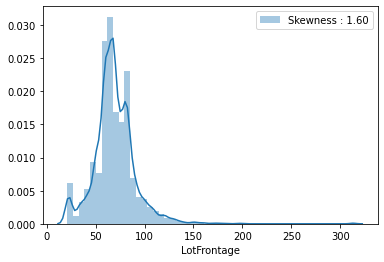

LotArea


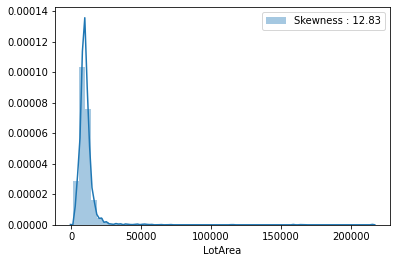

MasVnrArea


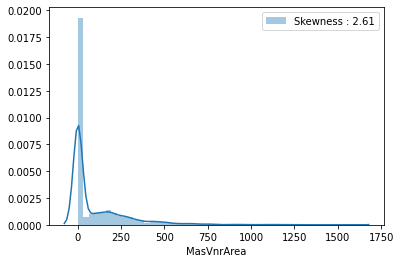

BsmtFinSF1


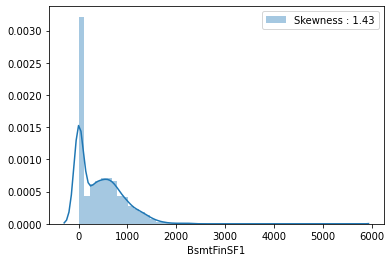

BsmtFinSF2


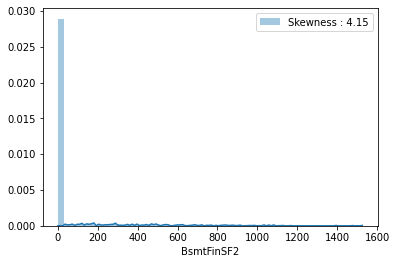

BsmtUnfSF


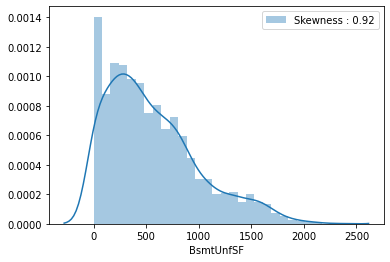

TotalBsmtSF


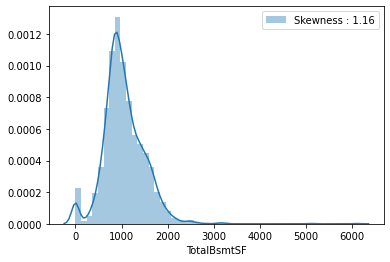

1stFlrSF


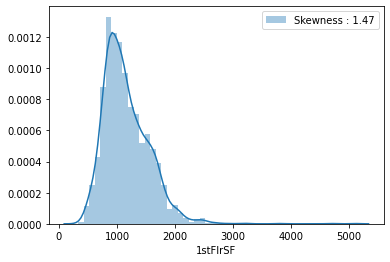

2ndFlrSF


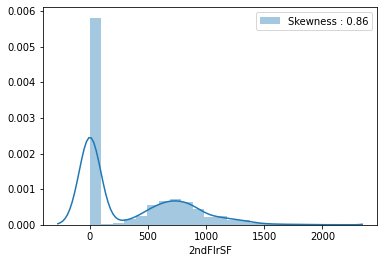

LowQualFinSF


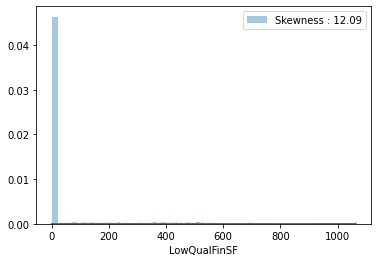

GrLivArea


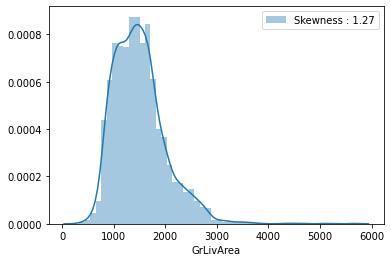

BsmtFullBath


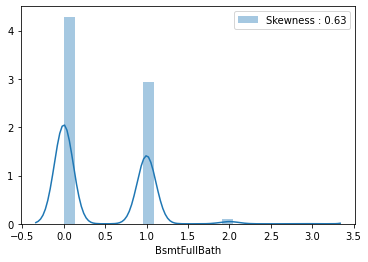

BsmtHalfBath


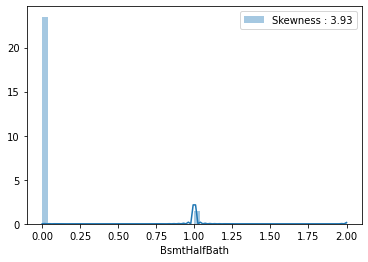

FullBath


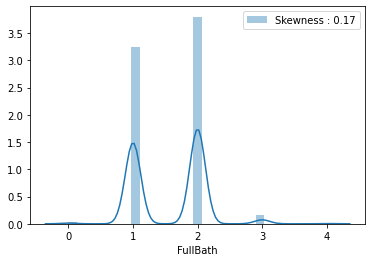

HalfBath


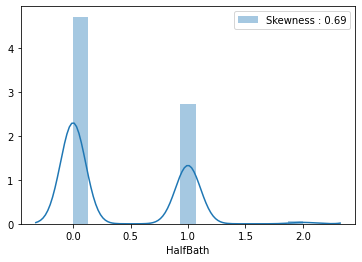

BedroomAbvGr


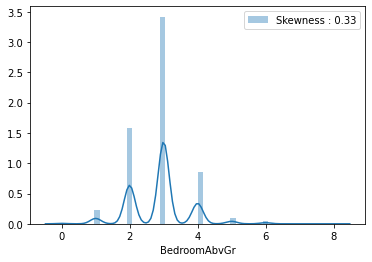

KitchenAbvGr


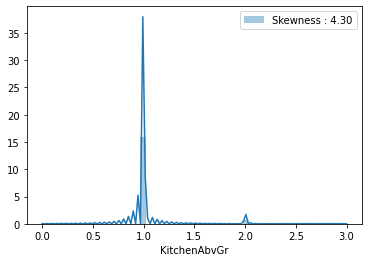

TotRmsAbvGrd


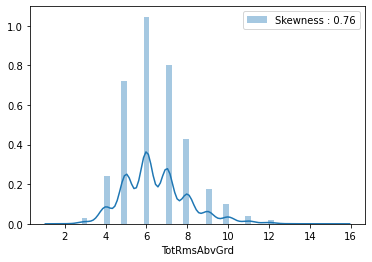

Fireplaces


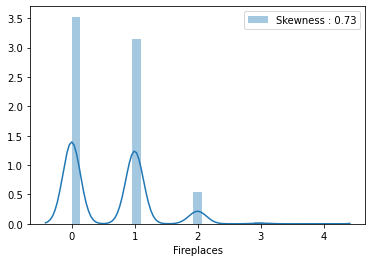

GarageCars


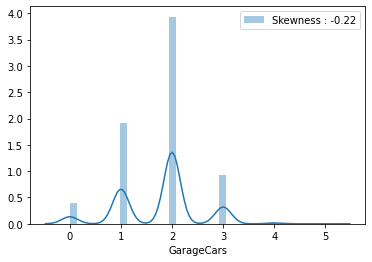

GarageArea


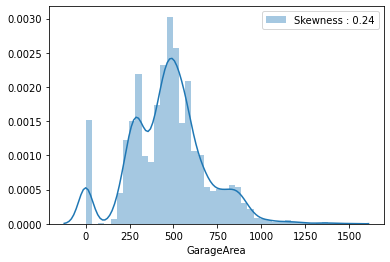

WoodDeckSF


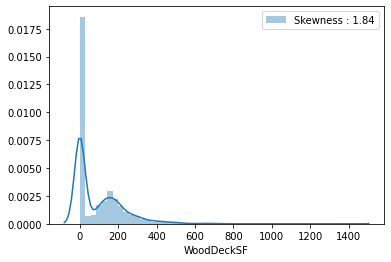

OpenPorchSF


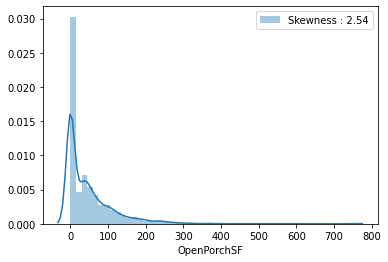

EnclosedPorch


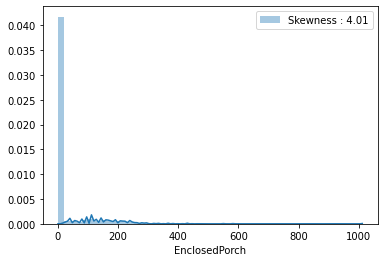

3SsnPorch


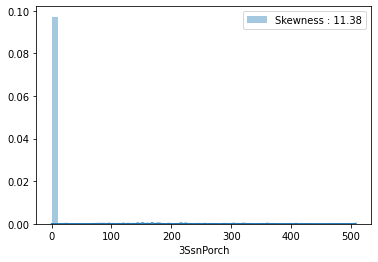

ScreenPorch


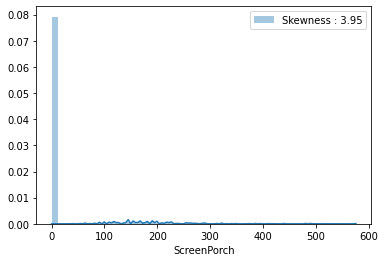

PoolArea


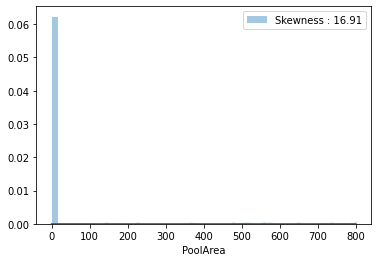

MiscVal


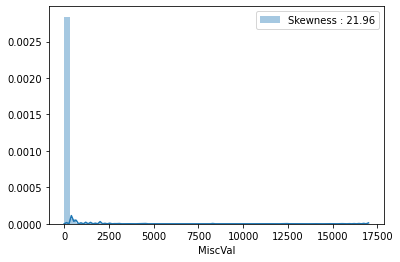

In [ ]:
for i in skewed_features:
    print(i)
    g = sns.distplot(df[i])
    g = g.legend(['Skewness : {:.2f}'.format(df[i].skew())],loc='best')
    plt.show()

In [ ]:
#removing skewness

In [ ]:
for i in skewed_features:
  df[i] = np.log(df[i]+1)

In [ ]:
SalePrice = np.log(train['SalePrice']+1)

In [ ]:
# creating Dummies for all non ordinal categorical data

In [ ]:
qual = list(df.loc[:,df.dtypes == "object"].columns.values)

In [ ]:
len(qual)

29

In [ ]:
dummy_drop = []
for i in qual:
  dummy_drop += [i+'_'+str(df[i].unique()[-1])]

df=pd.get_dummies(df,columns=qual)
df=df.drop(dummy_drop,axis=1)  


In [ ]:
df.shape

(2919, 498)

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
scaler = RobustScaler()
scaler.fit(df)
df = scaler.transform(df)

In [ ]:
#moddling

In [ ]:
#spillting data

In [ ]:
train_len = len(train)


In [ ]:
X_train =  df[:train_len]

In [ ]:
X_test=df[train_len:]

In [ ]:
X_train.shape

(1460, 498)

In [ ]:
X_test.shape

(1459, 498)

In [ ]:
Y_train=SalePrice

In [ ]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import make_scorer,r2_score

In [ ]:
def test_model(model):
  cv = KFold(n_splits = 3,shuffle=True,random_state=45)
  r2 = make_scorer(r2_score)
  r2_val_score = cross_val_score(model,X_train,Y_train,cv=cv,scoring=r2)
  score=[r2_val_score.mean()]
  return score

In [ ]:
import sklearn.linear_model as linear_model

In [ ]:
LR = linear_model.LinearRegression()
test_model(LR)

[-3.8209697714820125e+21]

In [ ]:
Rid = linear_model.Ridge()
test_model(Rid)

[0.8632000183497875]

In [ ]:
#LASSO Regression :This model may be very sensitive to outliers.
#So we need to made it more robust on them. 
#For that we use the sklearn's Robustscaler() method on pipeline
lasso = linear_model.Lasso(alpha= 1e-4)
test_model(lasso)

[0.8664467821480311]

In [ ]:
# ensemble Modelling -  multiple model generating

In [ ]:
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor

In [ ]:
BR = BaggingRegressor(base_estimator=None,n_estimators = 1000,random_state =10)

In [ ]:
test_model(BR)

[0.8550219685981327]

In [ ]:
#Gradient Boosting Regression : With huber loss that makes it robust to outliers

In [ ]:
GB = GradientBoostingRegressor(n_estimators = 1000 , learning_rate=0.1,loss='ls',random_state=10)

In [ ]:
test_model(GB)

[0.8805598941820105]

In [ ]:
GB.fit(X_train,Y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=10, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
Y_predict = np.expm1(GB.predict(X_test)).round(2)

In [ ]:
Y_predict[0:5]

array([117162.62, 161686.42, 179317.34, 191200.11, 187626.53])

In [ ]:
Y_predict

array([117162.62, 161686.42, 179317.34, ..., 160421.62, 112543.22,
       228234.66])